![Cloud-First](https://github.com/tulip-lab/sit742/blob/develop/Jupyter/image/CloudFirst.png?raw=1) 


# SIT742: Modern Data Science
**(Module: Big Data Manipulation)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.
- If you found any issue/bug for this document, please submit an issue at [tulip-lab/sit742](https://github.com/tulip-lab/sit742/issues)


Prepared by **SIT742 Teaching Team**

---


## Session 4A: Data Wrangling

In this session, we will learn how to use Python `pandas` package to do data wrangling.



### Content


1. Using `Pandas` to Load `CSV` Data Sets

2. Structuring Data

3. Data Cleaning 

4. Data Transformation



**Note**: The data available on those service might be changing, so you need to adjust the code to accommodate those changes.

---

## Part 1. Using `Pandas` to Load `CSV` Data Sets

Here you will learn  how to use Pandas [read_csv()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function to load a CSV file. Before we start importing our CSV file, it might be good for you to read [Pandas tutorial on reading CSV files](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table).

If `wget` was not installed in your `Python` platform, install it first:

To get started, we can import `Pandas` with:

In [ ]:
import pandas as pd

In [ ]:
!pip install wget

Suppose the `csv` data file is avilable at a URL, we use `wget` to download it to the local file system.


In [ ]:
import wget

link_to_data1 = 'https://github.com/tulip-lab/sit742/raw/main/Jupyter/data/user-raw1.csv'
DataSet1 = wget.download(link_to_data1)

link_to_data2 = 'https://github.com/tulip-lab/sit742/raw/main/Jupyter/data/user-raw2.csv'
DataSet2 = wget.download(link_to_data2)


### Importing `CSV` data

Importing `CSV` files with `Pandas` function [`read_csv()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)  and converting the data into a form Python can understand is simple. It only takes a couple of lines of code. The imported data will be stored in Pandas `DataFrame`.



In [ ]:
userdf1 = pd.read_csv("user-raw1.csv", skipinitialspace=True)
userdf2 = pd.read_csv("user-raw2.csv", skipinitialspace=True)

print(userdf1.head())
print(userdf2.head())

## Part 2. Structuring Data


Raw data is typically unusable in its raw state, and this is not just because of the dirty data, but sometimes because of the misformat for its intended application. Structuring is the process of taking raw data and transforming it to be more readily format for later steps, and it may involve merging multiple data sources into a single dataset with consistent or comprehensible data format. If the data comes from multiple sources, the attribute names and units of measurement may need consolidation through mapping and transformation. The specific format of your data takes will depend on the data analytics methods/tools.


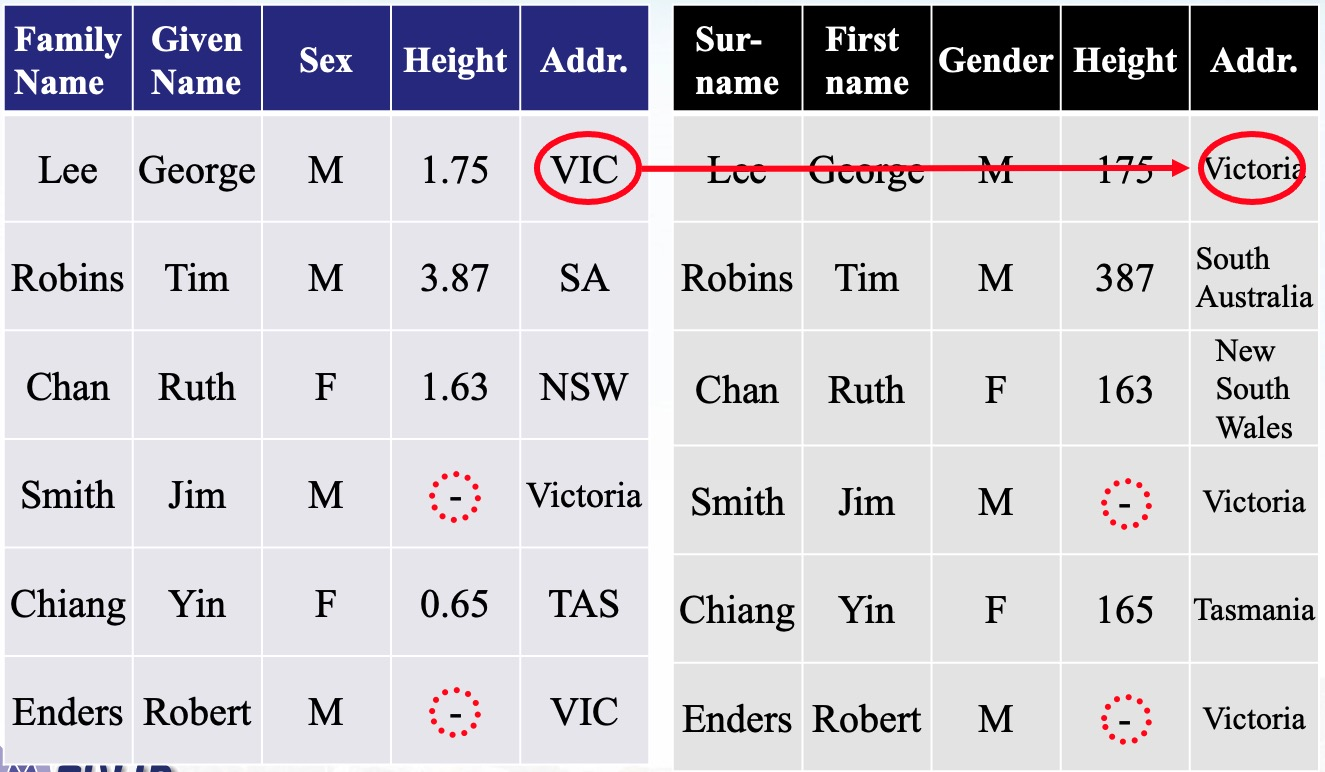
For the datasets in above figure, we can see some issues.
Thess issues come from data integration process, when multiple data sources were involved:

- An attribute may have different names in different databases. For example, `Sex`  vs `Gender`;
- A value of an attribute may have different measures in different sources; For example, `1.75m` vs `175cm`;
- Different values of an attribute may have the same meaning; For example, `VIC` and `Victoria`.
- Data Redundancy may lead to inconsistency; For example, when a dataset contains both `Date of Birth` and `Age`, inconsistency might occur.





### 2.1 Renaming Column Names as Per Convenience

This steps involves renaming the colmns names because many column names are confusing and hard to understand.



In [ ]:
new_name = {'Sex': 'Gender',
           'Addr.': 'Address'}

userdf1.rename(columns = new_name, inplace = True)

new_name = {'Surname': 'Family Name',
           'First Name': 'Given Name',
           'Addr.': 'Address'}

userdf2.rename(columns = new_name, inplace = True)

### 2.2 Replacing the value of the rows if needed

This involves replacing the values with values more reable, such as `M` by `Male`, etc. 

In [ ]:
# Replace values for the column Gender
replace_values = {'M': 'Male', 'F': 'Female'}

userdf1 = userdf1.replace({'Gender': replace_values})
userdf2 = userdf2.replace({'Gender': replace_values})


### 2.3 Removing one measurement for one attribute
This step involves choosing one measure only for `Height` attribute. 

In [ ]:
# Replace height in meters instead of centimeters for the column Height
userdf2["Height"] = userdf2["Height"] / 100

userdf2

### Exercises
Now, it is your turn to continue with dealing with inconvenience data.
Please complete the code to replace the state abbreviations by its full name, such as `VIC` by `Victoria`, etc.

In [ ]:
# Replace values for the column Address

<details><summary><font color="blue"><b>Click here for solutions to exercise</b></font></summary>
```python
replace_values = {'VIC': 'Victoria', 'NSW': 'New South Wales', 
                  'SA': 'South Australia', 'QLD': 'Queensland', 
                  'TAS': 'Tasmania'}

userdf1 = userdf1.replace({'Address': replace_values})
userdf2 = userdf2.replace({'Address': replace_values})

userdf1.head()
userdf2.head()
```

## Part 3. Data Cleaning

Data Cleaning involves deleting data that’s either unnecessary or irrelevant to the project, such as PCA for dimensionality reduction, outliers removal, or identifying missing data (for example, empty cells in a spreadsheet) and either filling or removing them.
 



### 3.1 Removing the Irrelevant Columns

Suppose two irrelevant columns are `PID` and `Address`.

In [ ]:
userdf1.head()

In [ ]:
to_drop = ['PID', 'Address']

userdf1.drop(to_drop, inplace=True, axis = 1)
userdf1.head()

### 3.2 Missing Data

To find and fill the missing data in the dataset we will use another function. There are 2 ways to find the null values if present in the dataset. Let’s see them one by one:

- Using `isnull()`: This function provides the boolean value for the complete dataset to know if any null value is present or not.
- Using `isna().any()`: This function gives a boolean value if any null value is present or not, but it gives results column-wise, not in tabular format.

In [ ]:
# find the missing value in the dataframes
# apply isnull() to the dataframes
userdf1.isnull()
userdf2.isnull()

#apply isna().any() to the dataframes 
userdf1.isna().any()
userdf2.isna().any()

# drop those null value rows in userdf1
userdf1.dropna(axis=0, inplace=True)

#drop null value columns in userdf2
userdf2.dropna(axis=1, inplace=True)

In [ ]:
userdf1.head()

In [ ]:
userdf2.head()

### 3.3 Data Merging


Merging the dataset is the process of combining two datasets in one, and line up rows based on some particular or common property for data analysis. We can do this by using the `merge()` function of the dataframe. Following is the syntax of the merge function:

Left join? or just Concanate...


In [ ]:
userdf = pd.merge(userdf1, userdf2, how='inner', on=None, left_on=None, 
                  right_on=None, left_index=False, right_index=False, 
                  sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, 
                  validate=None)

### 3.4 De-Duplicate

De-Duplicate means remove all duplicate values. There is no need for duplicate values in data analysis. These values only affect the accuracy and efficiency of the analysis result. To find duplicate values in the dataset we will use a simple dataframe function i.e. `duplicated()`. Let’s see the example:


In [ ]:
userdf.duplicated()

This function also provides bool values for duplicate values in the dataset. 

If a dataset contains duplicate values it can be removed using the `drop_duplicates()` function. Following is the syntax of this function:

In [ ]:
userdf.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

## Part 4. Data Transformation


Data transformation is a common practice in machine learning. 


### 4.1 Using The min-max normalization

Typically, Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.


In [ ]:
# copy the data
df_min_max_scaled = userdf.copy()
  
# apply normalization techniques
df_min_max_scaled['Height'] = (df_min_max_scaled['Height'] - df_min_max_scaled['Height'].min()) / (df_min_max_scaled['Height'].max() - df_min_max_scaled['Height'].min())

In [ ]:
# view normalized data
print(df_min_max_scaled)

### 4.2 Z-Score Standardization

Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

The z-score method (often called standardization) transforms the info into distribution with a mean of 0 and a typical deviation of 1. Each standardized value is computed by subtracting the mean of the corresponding feature then dividing by the quality deviation.

In [ ]:
# copy the data
df_z_scaled = userdf.copy()
  
# apply normalization techniques
df_z_scaled['Height'] = (df_z_scaled['Height'] - df_z_scaled['Height'].mean()) / df_z_scaled['Height'].std()    
  

In [ ]:
# view normalized data   
display(df_z_scaled)

### 4.3 Export Dataset

This is the last step of the data wrangling process. After performing all the above operations, the data is transformed into clean the dataset and it is ready to export for the next process in Data Science or Data Analysis.

In [ ]:
df_z_scaled.to_csv('cleaned_user_data.csv')